In [271]:
# first import statements 
import matplotlib.pyplot as plt 
from matplotlib import cm
import pandas as pd 
import numpy as np
import re
import os
import glob
import seaborn as sns
#from statannotations.Annotator import Annotator


In [194]:
path = os.getcwd()

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

fileList = sorted(glob.glob(path + '/bolus' + '/*.csv'), key=numericalSort)
print(fileList)
list = [pd.read_csv(filename, header=0) for filename in fileList]
names = [os.path.basename(filename) for filename in fileList]

names

df = pd.concat(list, axis=0, ignore_index=False, keys=names)

df.loc['HowToNasalNaloxoneFor_Fentanyl109.csv']

#example of extracting just the time column of one set of data
#df.loc['HowToNasalNaloxoneFor_Fentanyl1099.csv', 'Time(s)']

#df.loc['HowToNasalNaloxoneFor_Fentanyl1099.csv'].plot(x='Time(s)', y='totalNaloxone_mg')

['c:\\Users\\abaird1\\Documents\\Publications\\2022\\cptpsp\\naloxone\\data\\reversal\\RepeatExperiment/bolus\\HowToNasalNaloxoneFor_Fentanyl20.csv', 'c:\\Users\\abaird1\\Documents\\Publications\\2022\\cptpsp\\naloxone\\data\\reversal\\RepeatExperiment/bolus\\HowToNasalNaloxoneFor_Fentanyl30.csv', 'c:\\Users\\abaird1\\Documents\\Publications\\2022\\cptpsp\\naloxone\\data\\reversal\\RepeatExperiment/bolus\\HowToNasalNaloxoneFor_Fentanyl40.csv', 'c:\\Users\\abaird1\\Documents\\Publications\\2022\\cptpsp\\naloxone\\data\\reversal\\RepeatExperiment/bolus\\HowToNasalNaloxoneFor_Fentanyl50.csv', 'c:\\Users\\abaird1\\Documents\\Publications\\2022\\cptpsp\\naloxone\\data\\reversal\\RepeatExperiment/bolus\\HowToNasalNaloxoneFor_Fentanyl60.csv', 'c:\\Users\\abaird1\\Documents\\Publications\\2022\\cptpsp\\naloxone\\data\\reversal\\RepeatExperiment/bolus\\HowToNasalNaloxoneFor_Fentanyl70.csv', 'c:\\Users\\abaird1\\Documents\\Publications\\2022\\cptpsp\\naloxone\\data\\reversal\\RepeatExperiment/bo

,Time(s),totalNaloxone_mg,m_AfferentChemoreceptor_Hz,m_CentralFrequencyDelta_Per_min,m_CentralPressureDelta_cmH2O,m_PeripheralFrequencyDelta_Per_min,m_PeripheralPressureDelta_cmH2O,m_OxygenAutoregulatorHeart,m_OxygenAutoregulatorMuscle,OxygenSaturation,...,DiastolicArterialPressure(mmHg),RespirationRate(1/min),TidalVolume(mL),HeartStrokeVolume(mL),EndTidalCarbonDioxideFraction,TotalAlveolarVentilation(L/min),SystemicVascularResistance(mmHg_s/mL),BloodVolume(mL),MeanUrineOutput(mL/hr),NeuromuscularBlockLevel
0,1,0,3.49988,0.001087,0.001010,-0.002817,-0.000939,0.000003,0.0,0.979062,...,74.4068,16.0428,514.497,80.3115,0.043357,7.03376,0.953517,5532.50,60.9548,0
1,1,0,3.49988,0.001087,0.001010,-0.002817,-0.000939,0.000003,0.0,0.979062,...,74.4068,16.0428,514.497,80.3115,0.043357,7.03376,0.953517,5532.50,60.9548,0
2,2,0,3.49924,0.001158,0.001075,-0.002792,-0.000931,0.000000,0.0,0.979058,...,74.4248,16.0428,514.497,80.2586,0.043357,7.03376,0.948979,5532.51,60.6791,0
3,2,0,3.49924,0.001158,0.001075,-0.002792,-0.000931,0.000000,0.0,0.979058,...,74.4248,16.0428,514.497,80.2586,0.043357,7.03376,0.948979,5532.51,60.6791,0
4,3,0,3.50050,0.001297,0.001204,-0.002759,-0.000920,0.000000,0.0,0.979041,...,74.4127,16.0428,514.497,80.2838,0.043357,7.03376,0.948842,5532.52,60.8012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,960,12,3.27093,1.054330,0.979022,-0.520183,-0.173394,0.000000,0.0,0.981601,...,74.5619,16.6667,591.833,80.8814,0.045196,8.40335,0.949728,5574.11,77.6023,0
1920,961,12,3.27226,1.052470,0.977295,-0.521820,-0.173940,0.000000,0.0,0.981580,...,74.5747,16.6667,591.833,80.8726,0.045196,8.40335,0.949410,5574.20,77.2641,0
1921,961,12,3.27226,1.052470,0.977295,-0.521820,-0.173940,0.000000,0.0,0.981580,...,74.5747,16.6667,591.833,80.8726,0.045196,8.40335,0.949410,5574.20,77.2641,0
1922,962,12,3.27383,1.050640,0.975596,-0.523390,-0.174463,0.000000,0.0,0.981575,...,74.5705,16.6667,591.833,80.8783,0.045196,8.40335,0.949639,5574.30,77.2568,0


HowToNasalNaloxoneFor_Fentanyl20.csv
HowToNasalNaloxoneFor_Fentanyl60.csv
HowToNasalNaloxoneFor_Fentanyl99.csv
HowToNasalNaloxoneFor_Fentanyl139.csv
HowToNasalNaloxoneFor_Fentanyl180.csv


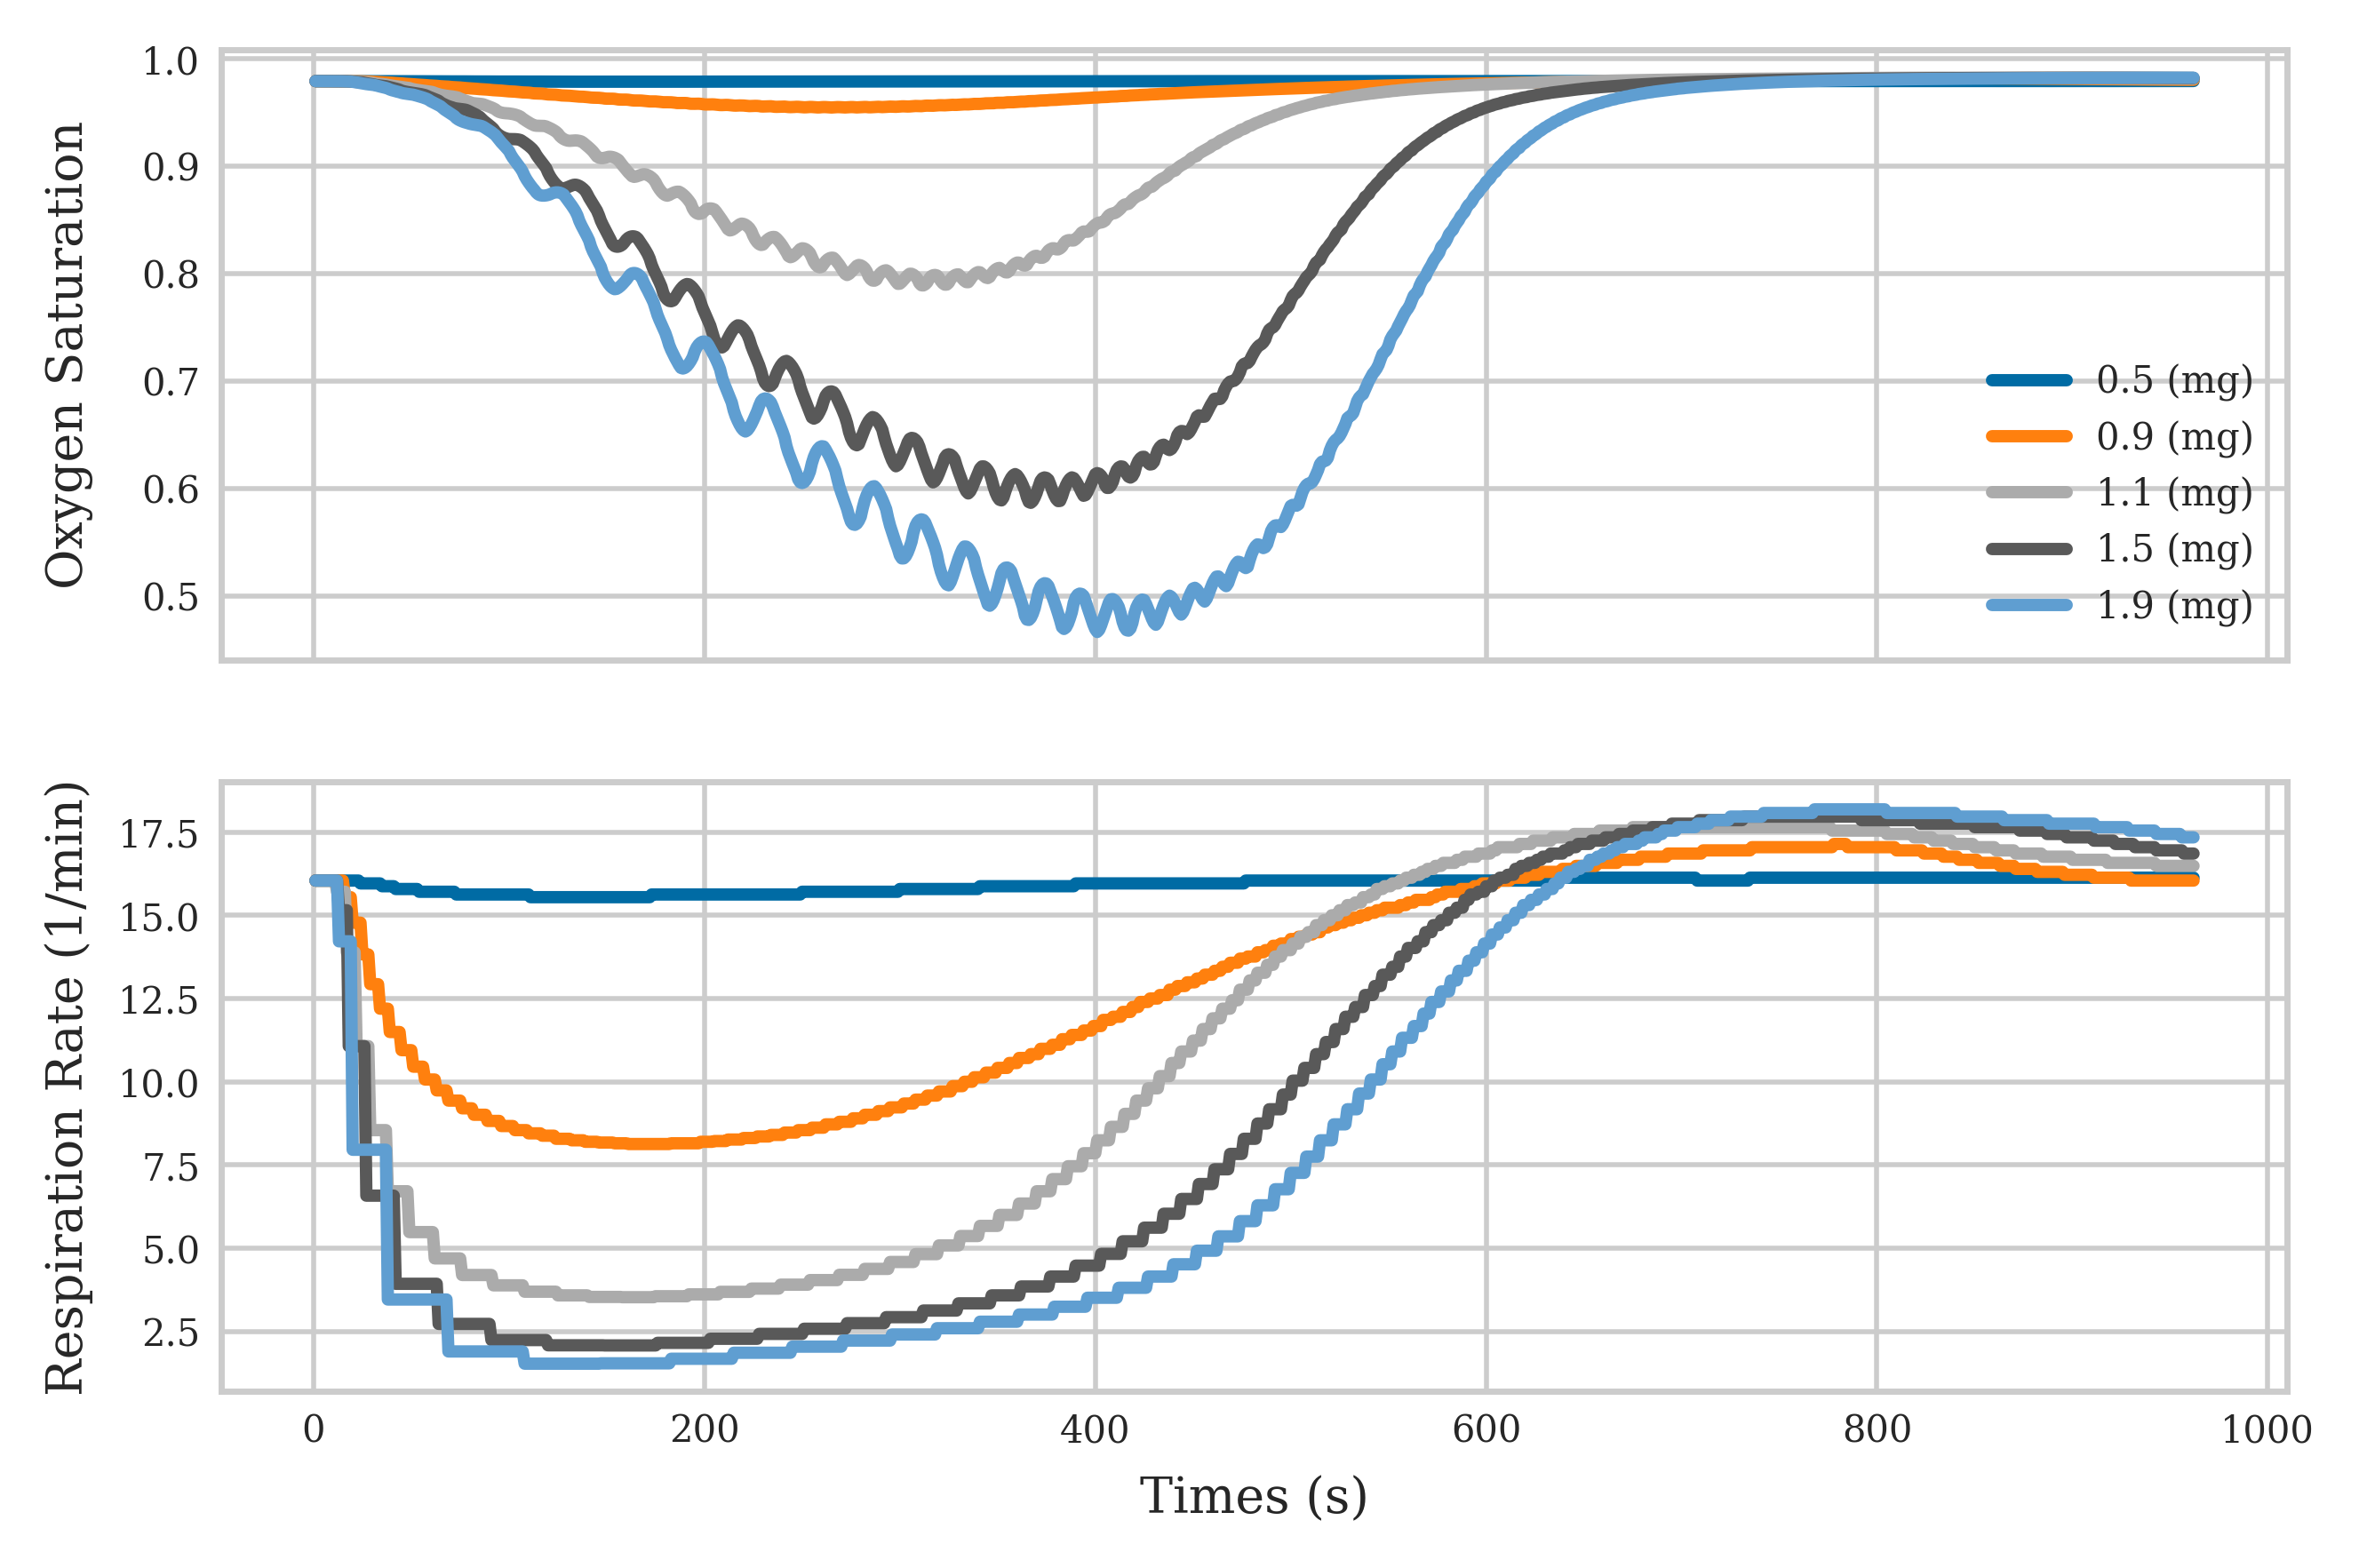

In [220]:
#create a respiratory effects overdose/naloxone: 
fig, (ax1, ax2) = plt.subplots(2, sharex=True, dpi=500)
plt.style.use('seaborn-whitegrid')
ax = plt.gca()
plt.rc('font', family='serif')
plt.rc('xtick', labelsize = 8)
plt.rc('ytick', labelsize = 8)
ax1.set_ylabel('Oxygen Saturation', fontsize=8)
ax2.set_ylabel('Respiration Rate (1/min)', fontsize=8)
ax2.set_xlabel('Times (s)', fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=6)
ax2.tick_params(axis='both', which='major', labelsize=6)

labels = ['0.5 (mg)', '0.9 (mg)', '1.1 (mg)', '1.5 (mg)', '1.9 (mg)']

temp = 0
for name in names[::4]: 
    print (name)
    ax1.plot(df.loc[name, 'Time(s)'], df.loc[name, 'OxygenSaturation'], label=labels[temp], linewidth=2)
    ax2.plot(df.loc[name, 'Time(s)'], df.loc[name, 'RespirationRate(1/min)'], linewidth=2)
    temp = temp + 1
    #ax3.plot(df.loc[name, 'Time(s)'], df.loc[name, 'TidalVolume(mL)'])
    
ax1.legend(loc = "lower right", fontsize=6)
fig.align_ylabels([ax1,ax2])
plt.savefig('respiratoryEffects.png', dpi=500)

#ax2.legend()




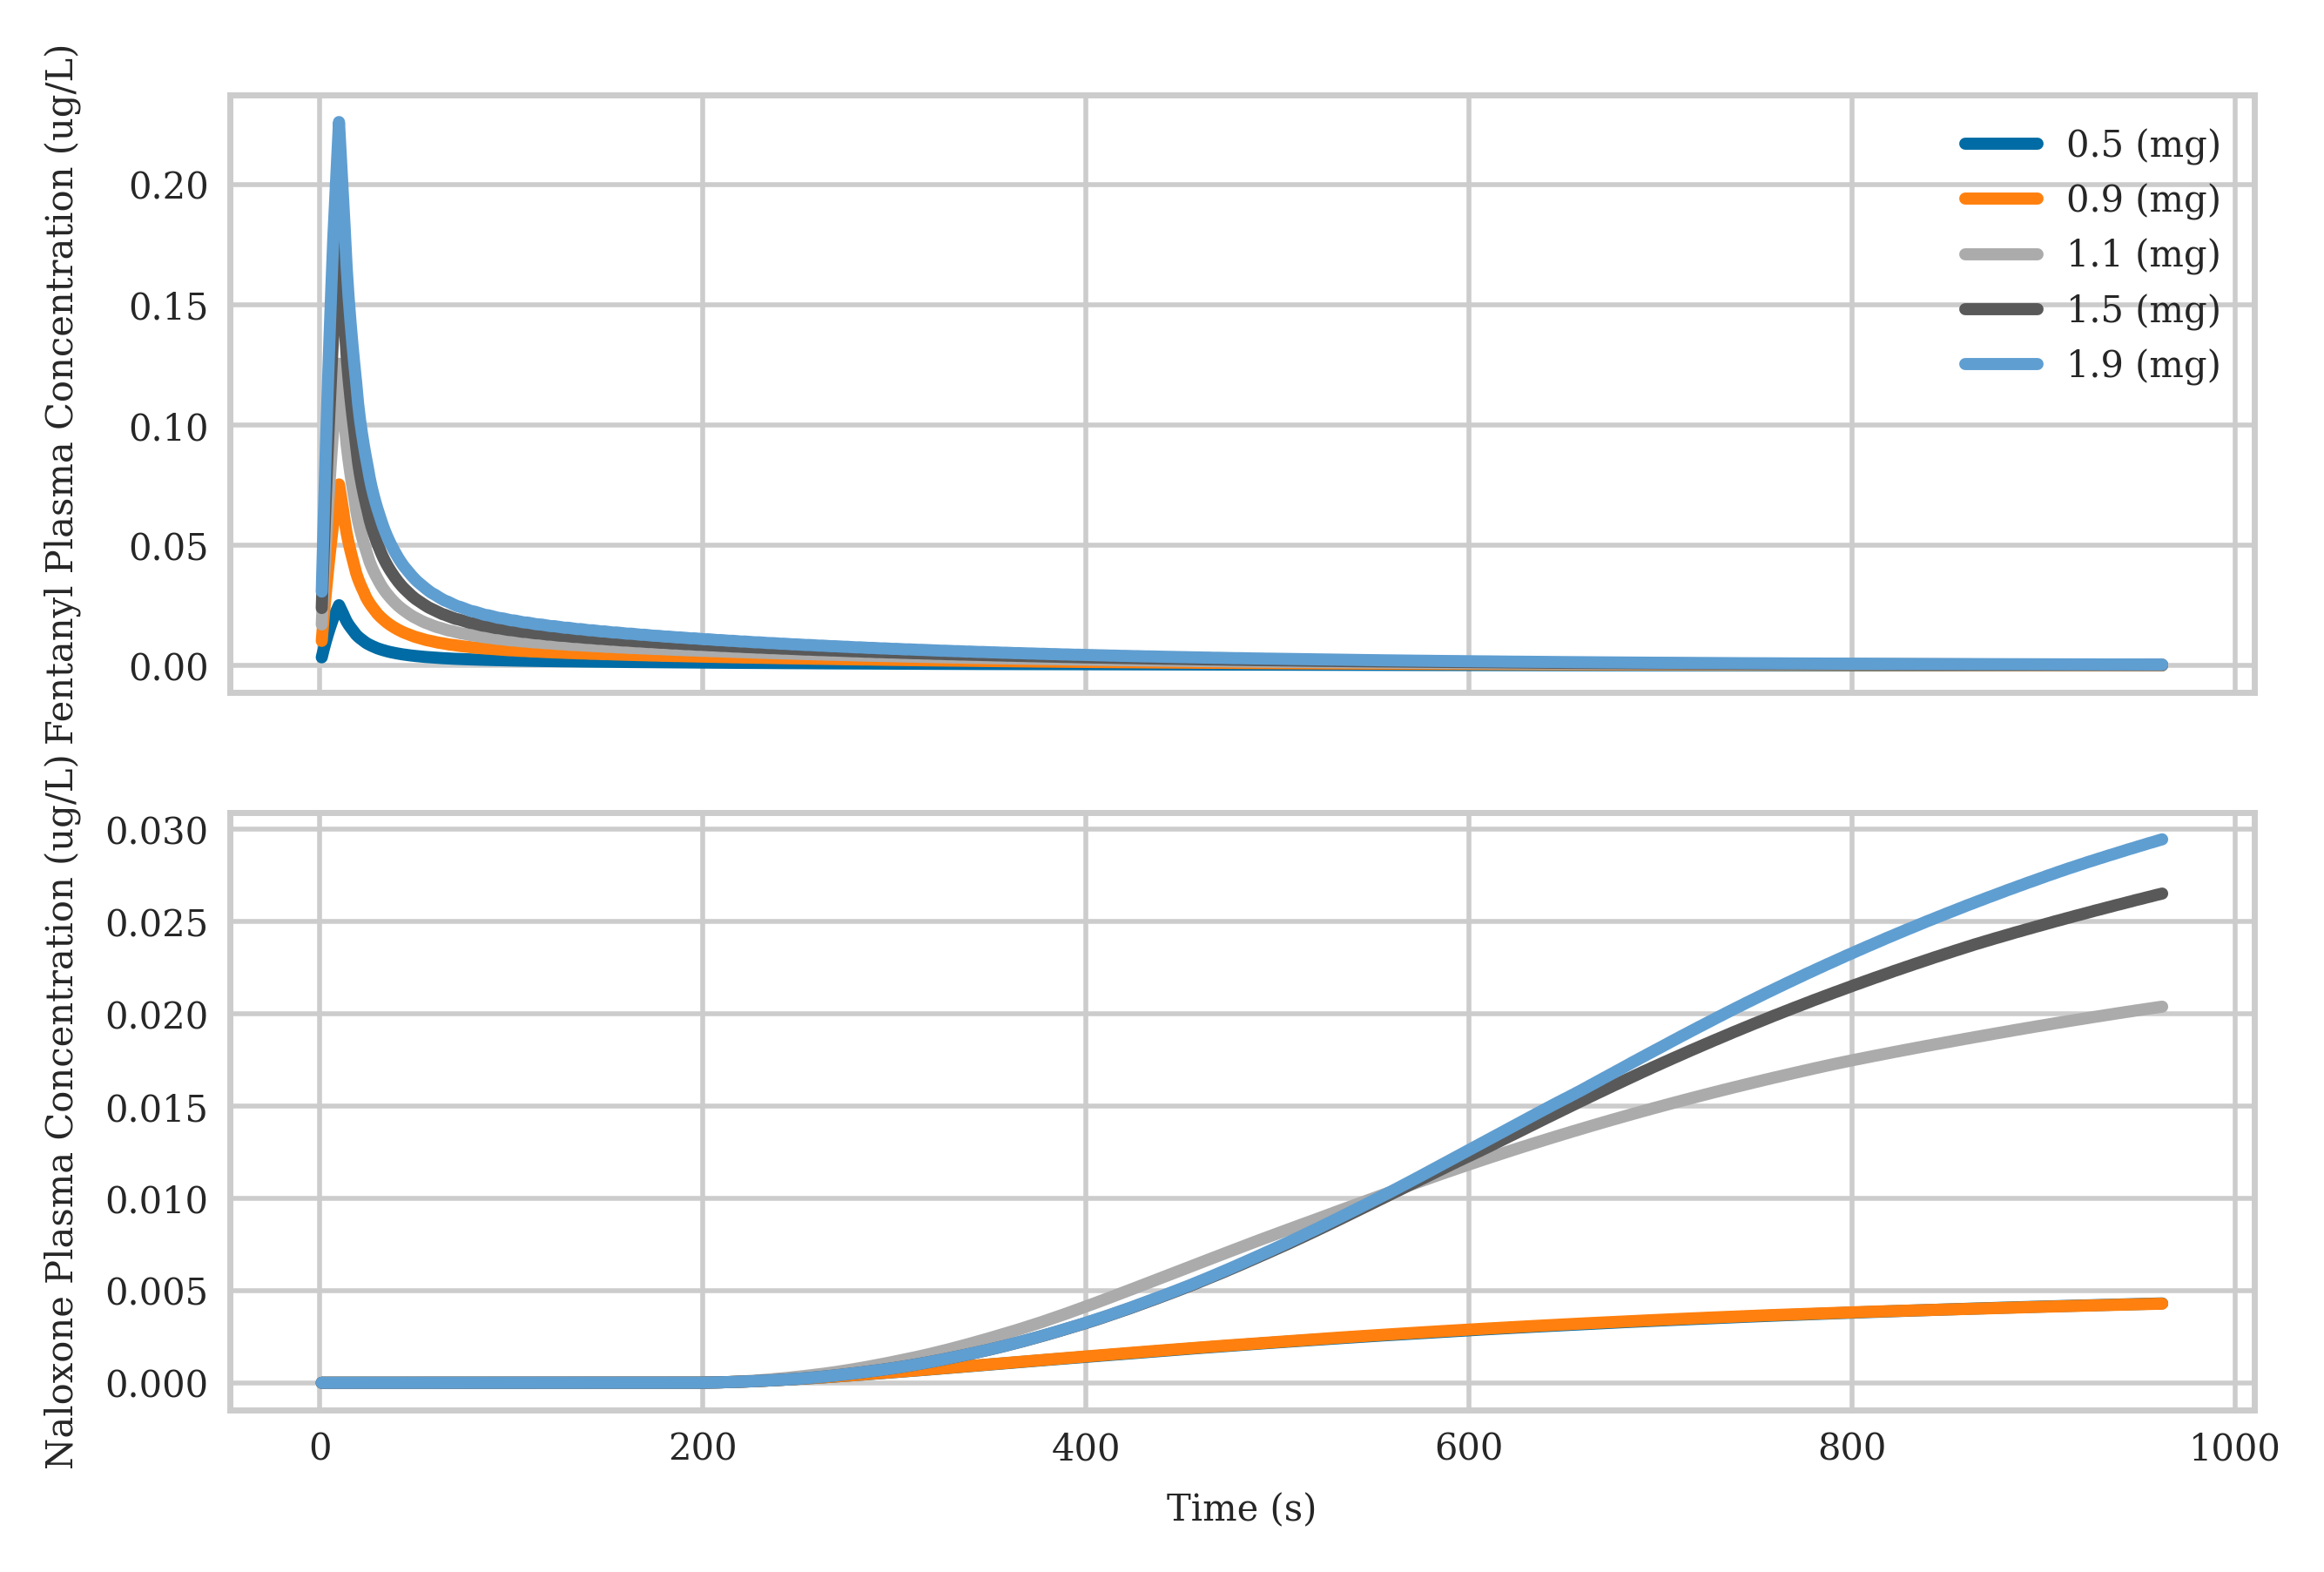

In [217]:

#create a dose effects overdose/naloxone: 
fig, (ax1, ax2) = plt.subplots(2, sharex=True, dpi=500)
ax = plt.gca()
plt.rc('font', family='serif')
plt.rc('xtick', labelsize = 'medium')
plt.rc('ytick', labelsize = 'medium')

ax1.set_ylabel('Fentanyl Plasma Concentration (ug/L)', fontsize=6)
ax2.set_ylabel('Naloxone Plasma Concentration (ug/L)', fontsize=6)
ax2.set_xlabel('Time (s)', fontsize=6)
ax1.tick_params(axis='both', which='major', labelsize=6)
ax2.tick_params(axis='both', which='major', labelsize=6)

labels = ['0.5 (mg)', '0.9 (mg)', '1.1 (mg)', '1.5 (mg)', '1.9 (mg)']
temp = 0
df = df.fillna(0)

for name in names[::4]: 
    ax1.plot(df.loc[name, 'Time(s)'], df.loc[name, 'Fentanyl-PlasmaConcentration(ug/mL)'], label=labels[temp], linewidth=2)
    ax2.plot(df.loc[name, 'Time(s)'], df.loc[name, 'Naloxone-PlasmaConcentration'], linewidth=2)
    #ax2.plot(df.loc[name, 'Time(s)'], df.loc[name, 'TotalAlveolarVentilation(L/min)'])
    temp = temp + 1
    #ax3.plot(df.loc[name, 'Time(s)'], df.loc[name, 'TidalVolume(mL)'])

fig.align_ylabels([ax1,ax2])
ax1.legend(fontsize=6)
plt.savefig('drugDynamics.png', dpi=500)

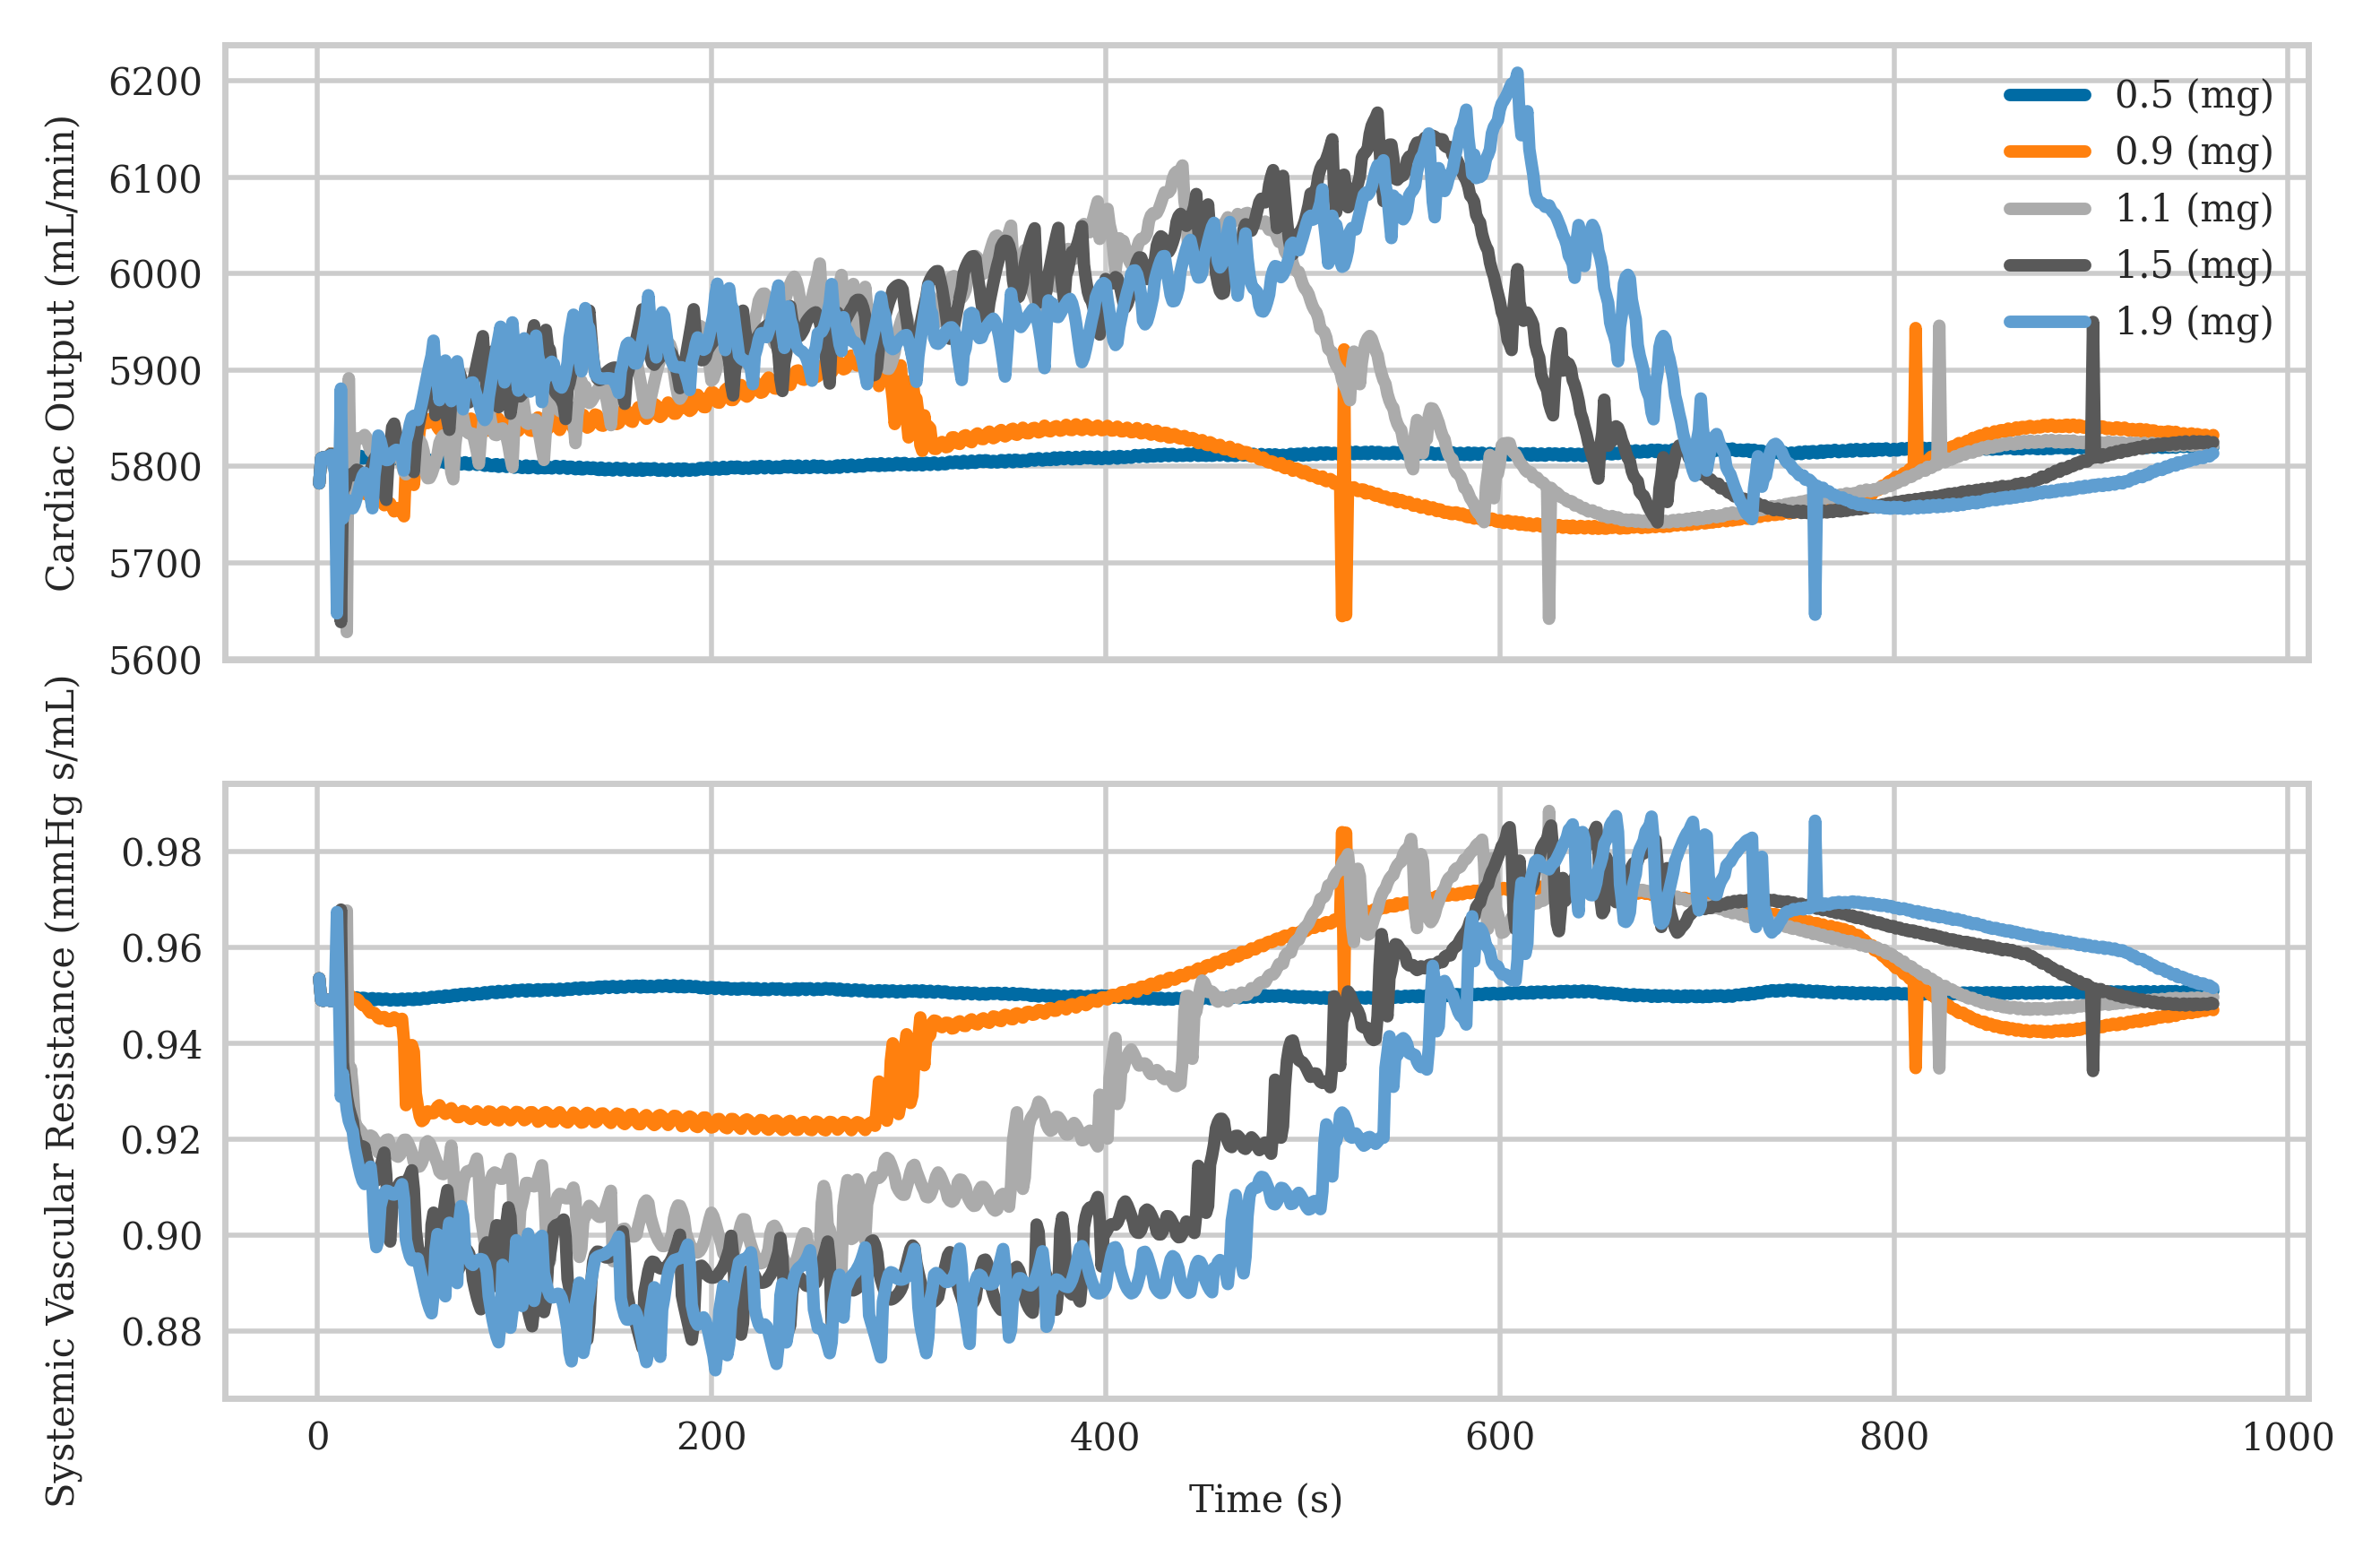

In [216]:
#create a cardiovascular effects overdose/naloxone: 
fig, (ax1, ax2) = plt.subplots(2, sharex=True, dpi=500)
ax = plt.gca()
plt.rc('font', family='serif')
plt.rc('xtick', labelsize = 'medium')
plt.rc('ytick', labelsize = 'medium')
ax2.set_xlabel('Time (s)', fontsize=6)


ax1.set_ylabel('Cardiac Output (mL/min)', fontsize=6)
ax2.set_ylabel('Systemic Vascular Resistance (mmHg s/mL)', fontsize=6)
ax1.tick_params(axis='both', which='major', labelsize=6)
ax2.tick_params(axis='both', which='major', labelsize=6)


labels = ['0.5 (mg)', '0.9 (mg)', '1.1 (mg)', '1.5 (mg)', '1.9 (mg)']
temp = 0

for name in names[::4]: 
    ax1.plot(df.loc[name, 'Time(s)'], df.loc[name, 'CardiacOutput(mL/min)'], label=labels[temp], linewidth=2)
    ax2.plot(df.loc[name, 'Time(s)'], df.loc[name, 'SystemicVascularResistance(mmHg_s/mL)'], linewidth=2)
    temp = temp +1
    #ax3.plot(df.loc[name, 'Time(s)'], df.loc[name, 'TidalVolume(mL)'])
    
ax1.legend(fontsize=6)
fig.align_ylabels([ax1,ax2])

plt.savefig('CardiovascularDynamics.png', dpi=500)


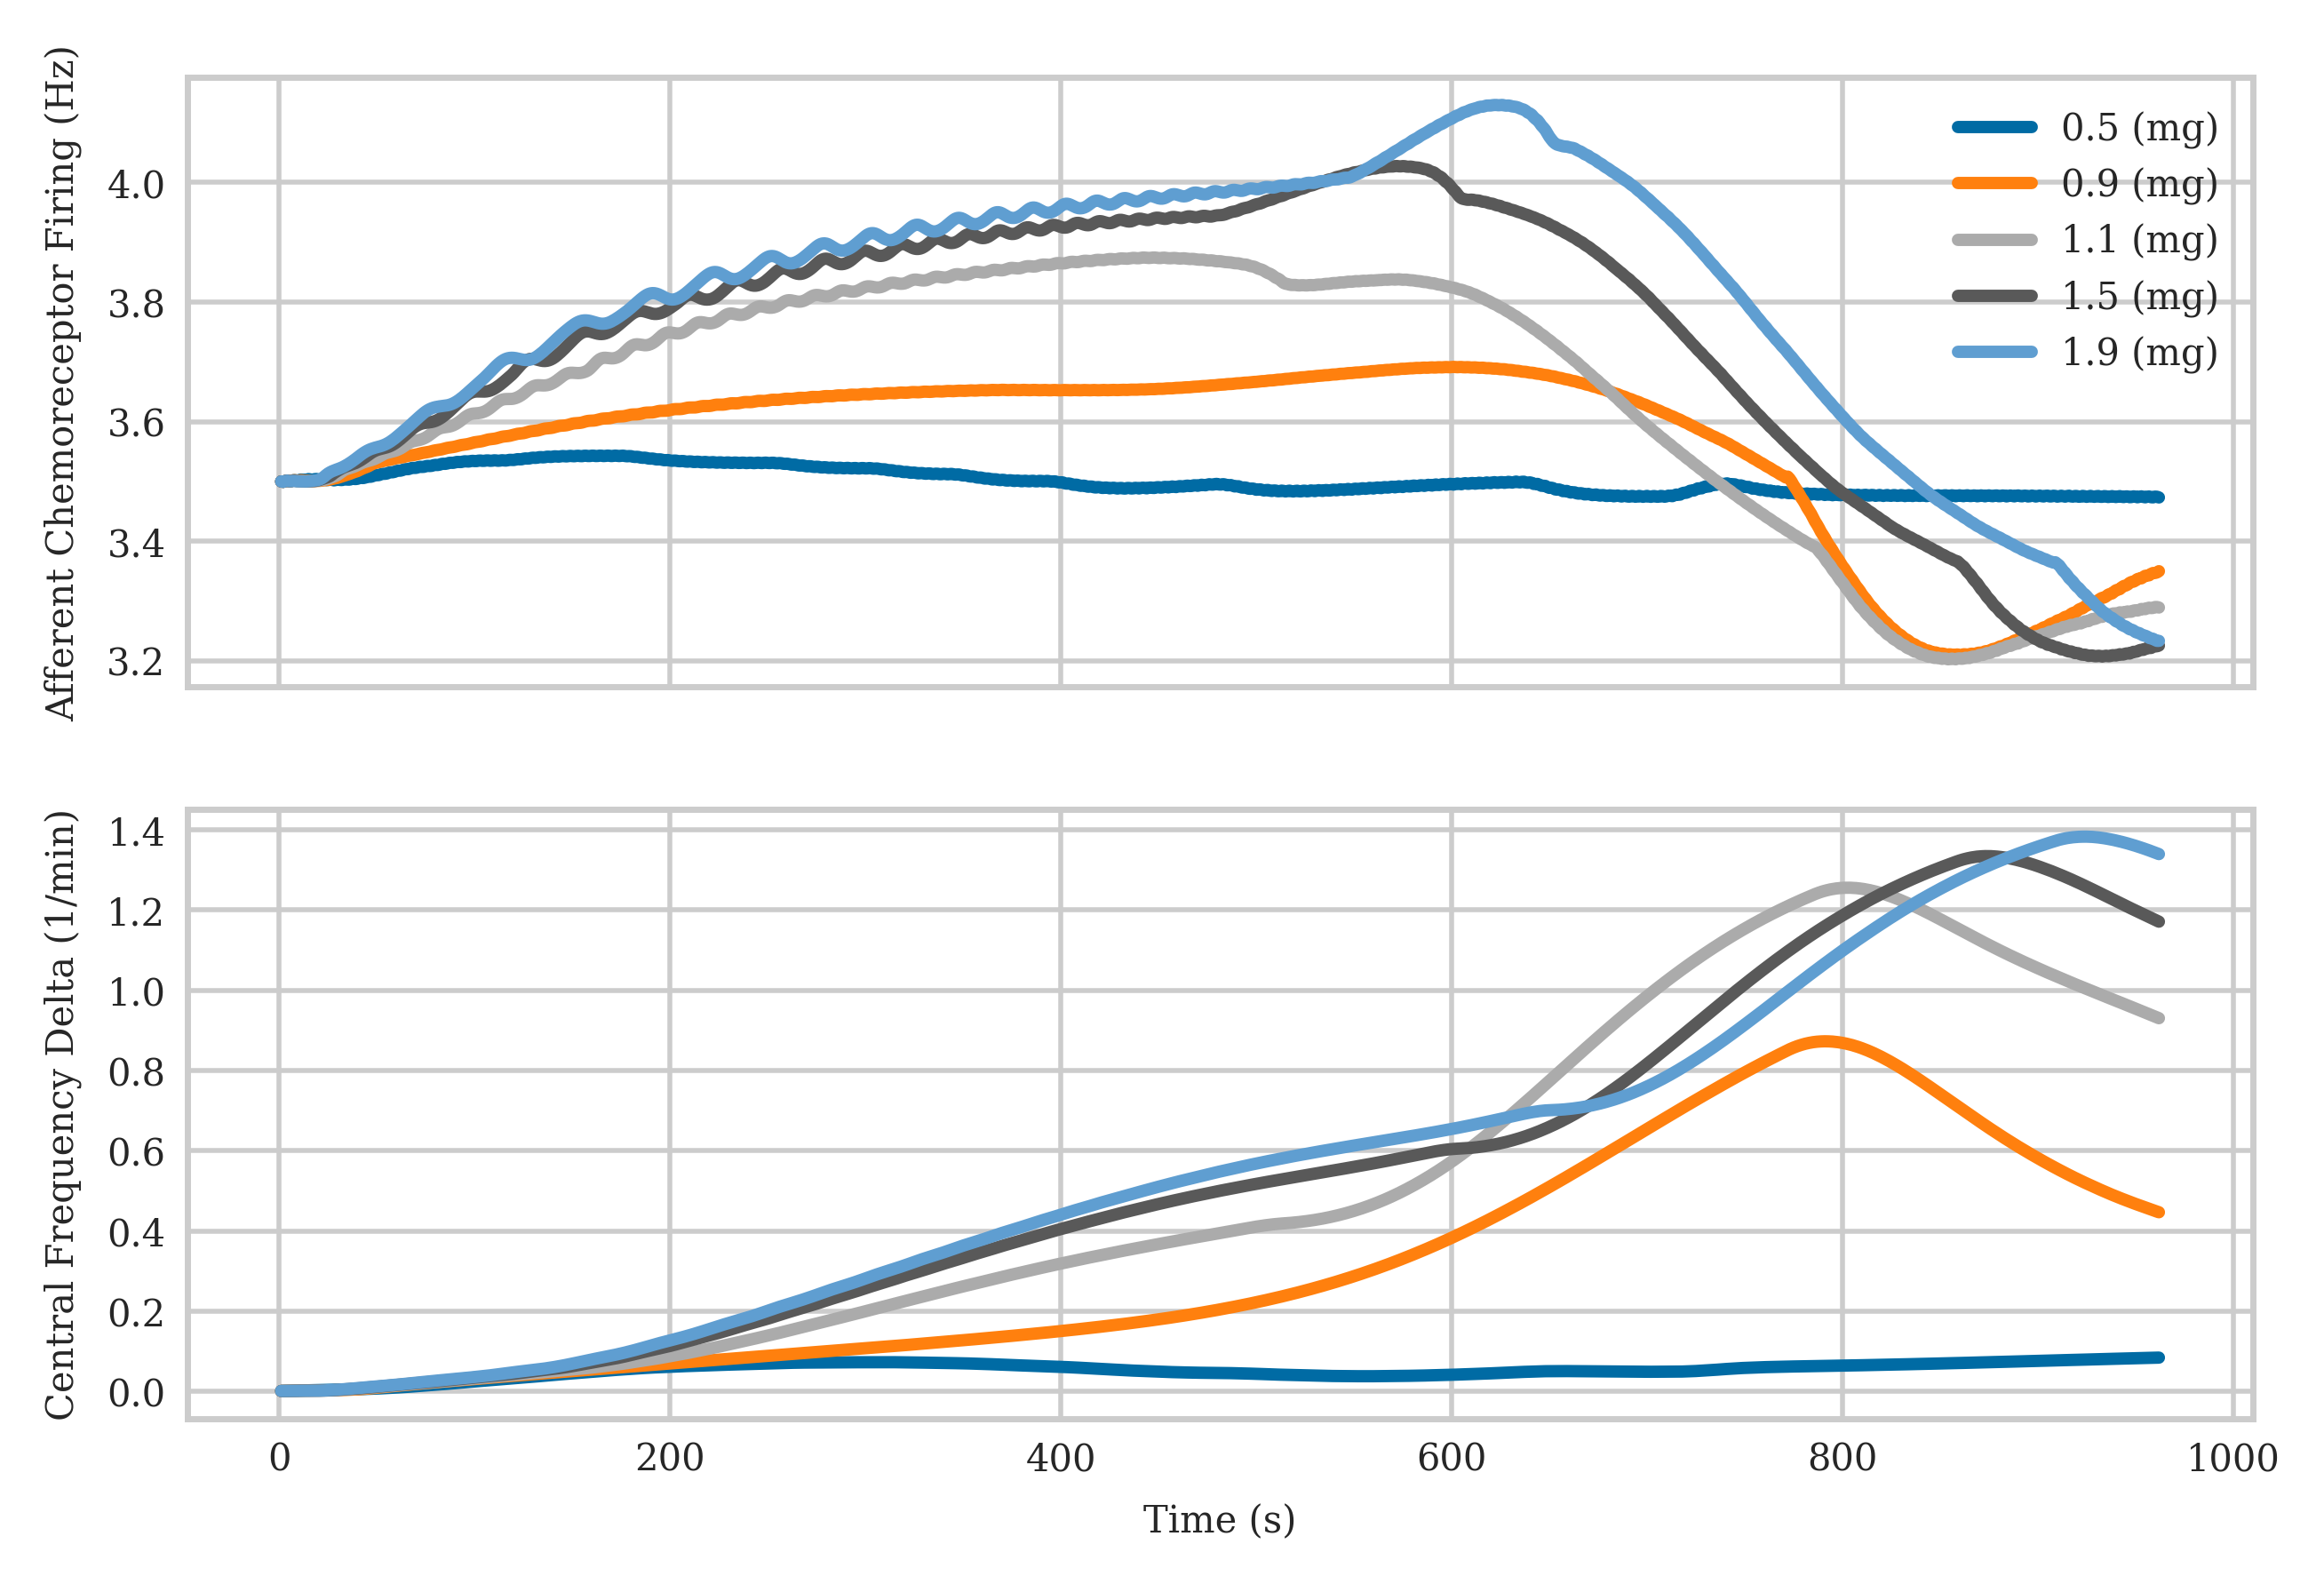

In [228]:
#create a nervous system effects overdose/naloxone: 
fig, (ax1, ax2) = plt.subplots(2, sharex=True, dpi=500)
ax = plt.gca()
plt.rc('font', family='serif')
plt.rc('xtick', labelsize = 'medium')
plt.rc('ytick', labelsize = 'medium')

ax1.set_ylabel('Afferent Chemoreceptor Firing (Hz)', fontsize=6)
ax2.set_ylabel('Central Frequency Delta (1/min)', fontsize=6)
ax2.set_xlabel('Time (s)', fontsize=6)
ax1.tick_params(axis='both', which='major', labelsize=6)
ax2.tick_params(axis='both', which='major', labelsize=6)

labels = ['0.5 (mg)', '0.9 (mg)', '1.1 (mg)', '1.5 (mg)', '1.9 (mg)']
temp = 0
for name in names[::4]: 
    ax1.plot(df.loc[name, 'Time(s)'], df.loc[name, 'm_AfferentChemoreceptor_Hz '], label=labels[temp], linewidth=2)
    ax2.plot(df.loc[name, 'Time(s)'], df.loc[name, 'm_CentralFrequencyDelta_Per_min '], linewidth=2)
    temp = temp + 1
    #ax3.plot(df.loc[name, 'Time(s)'], df.loc[name, 'TidalVolume(mL)'])

ax1.legend(fontsize=6)
fig.align_ylabels([ax1,ax2])

plt.savefig('nervousSystem.png', dpi=500)

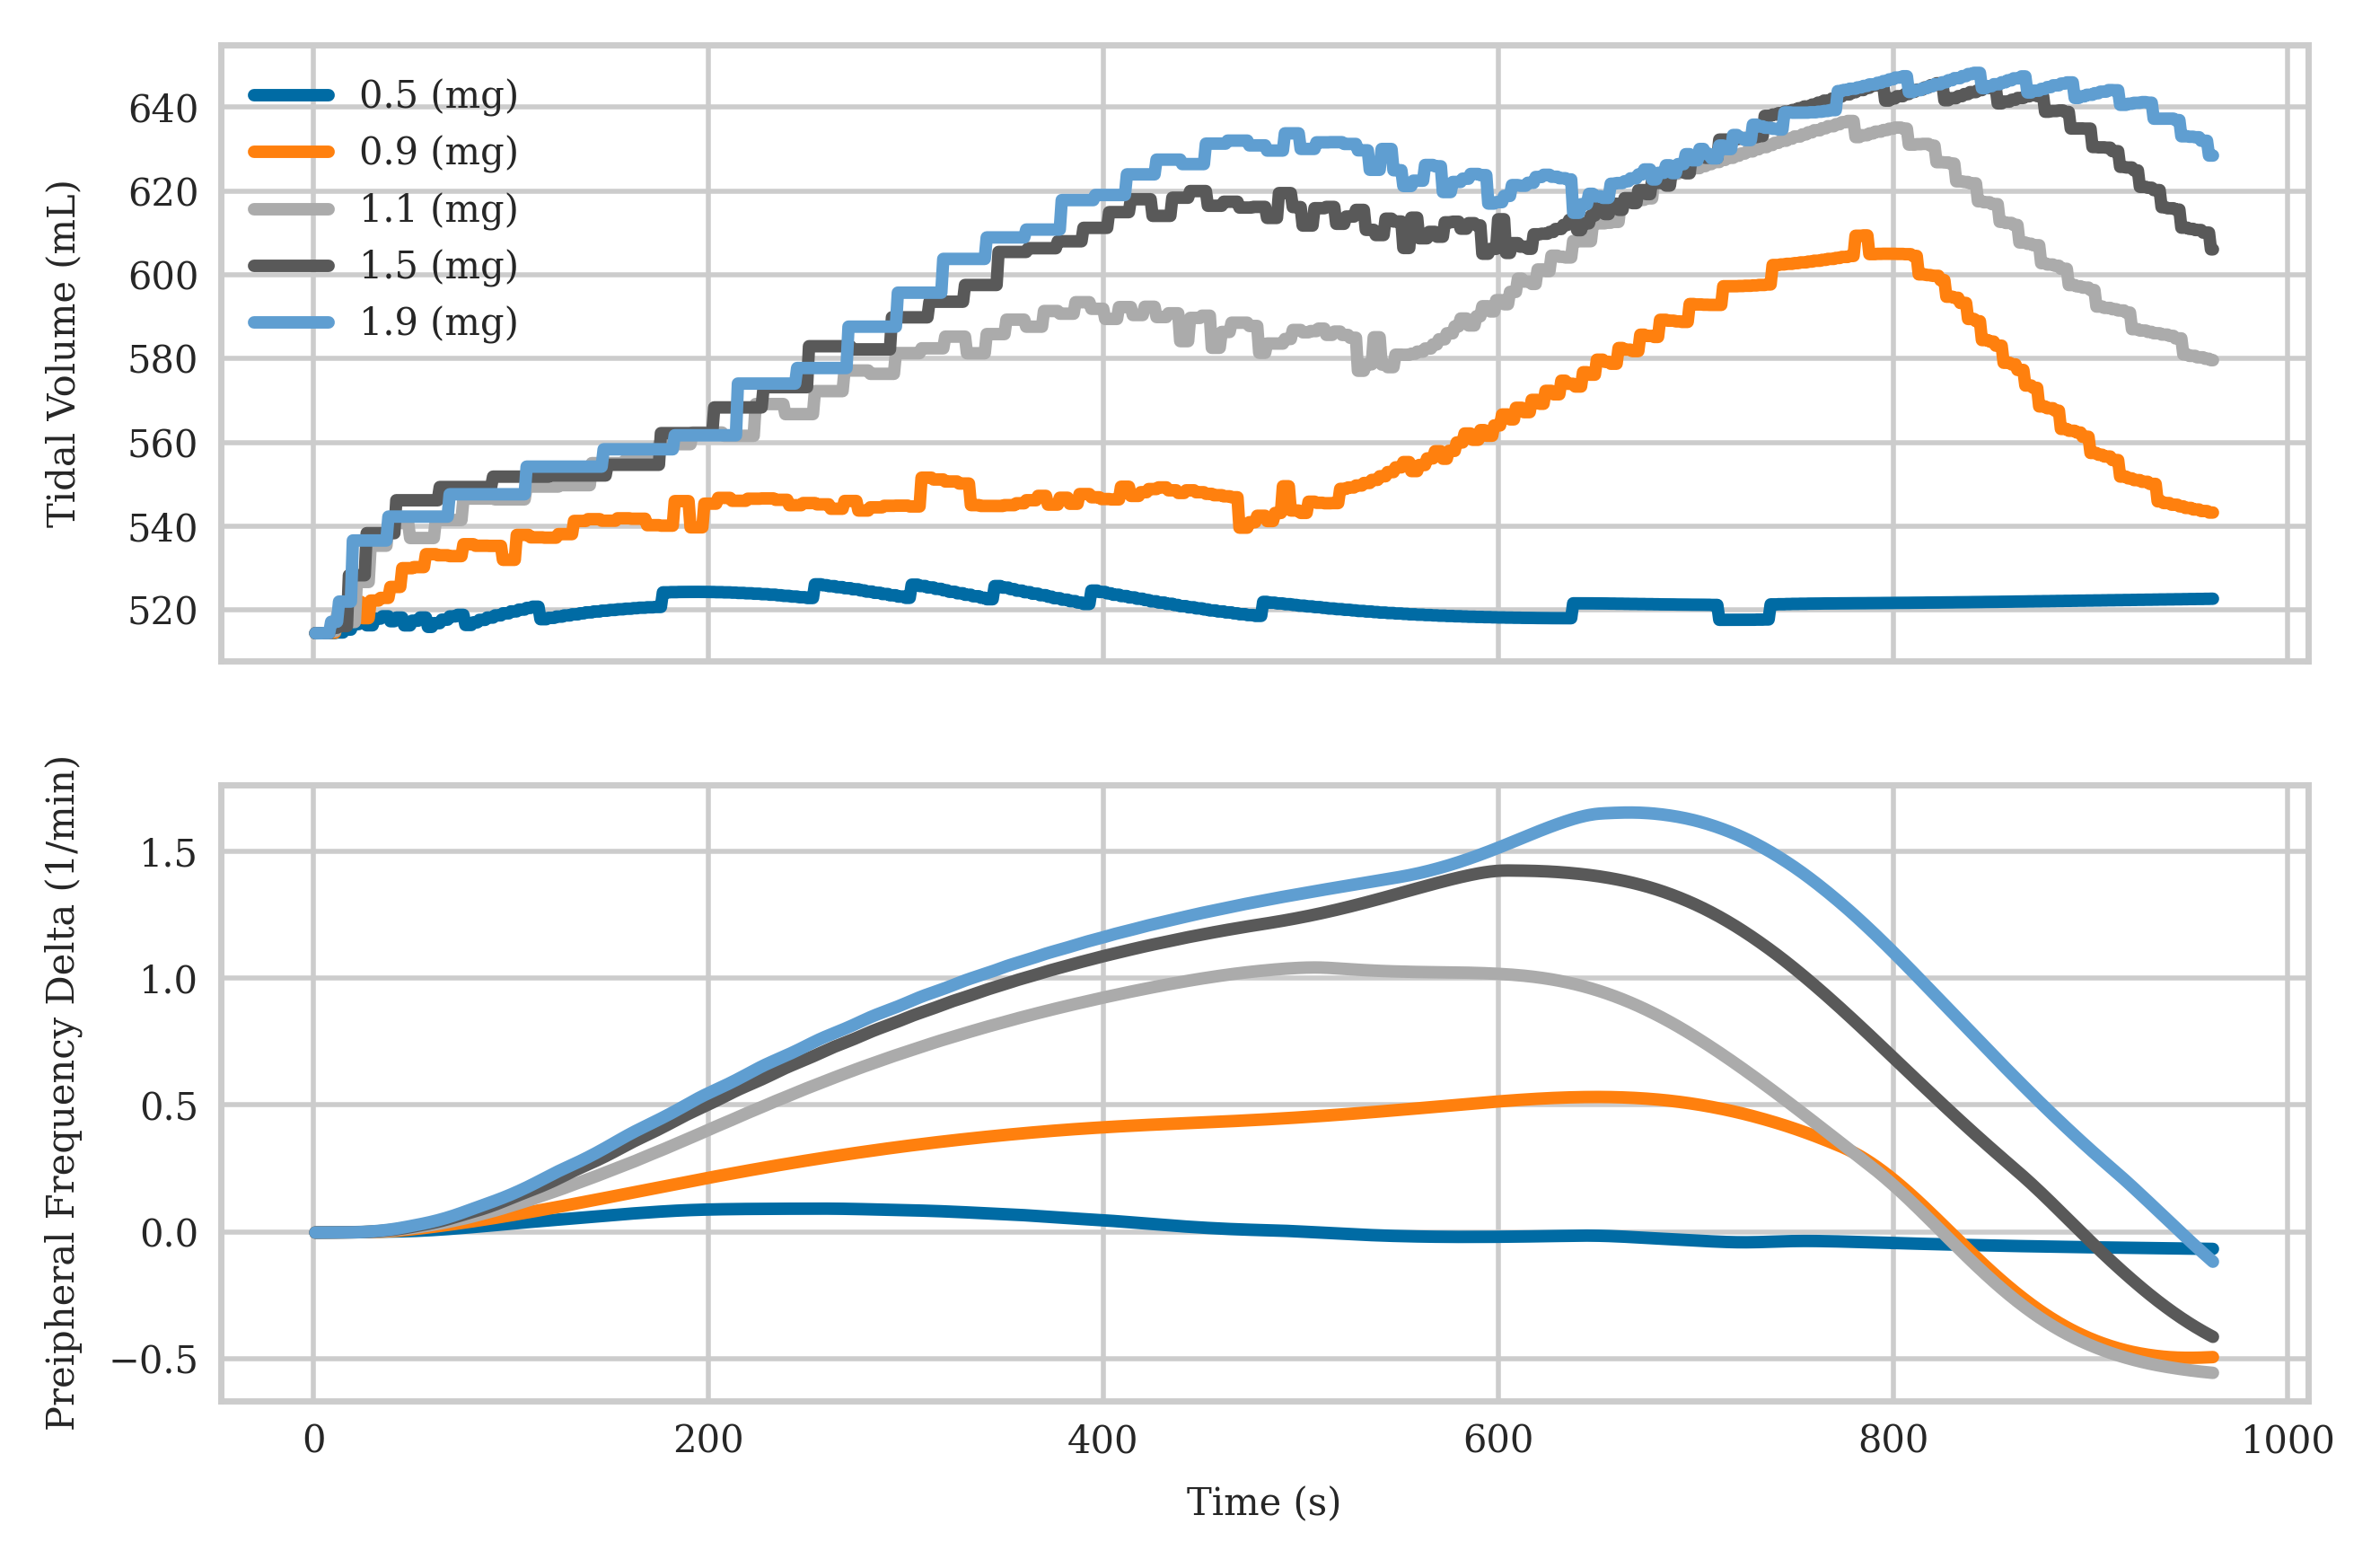

In [229]:
#create a nervous system effects overdose/naloxone: 
fig, (ax1, ax2) = plt.subplots(2, sharex=True, dpi=500)
ax = plt.gca()
plt.rc('font', family='serif')
plt.rc('xtick', labelsize = 'medium')
plt.rc('ytick', labelsize = 'medium')

ax1.set_ylabel('Tidal Volume (mL)', fontsize=6)
ax2.set_ylabel('Preipheral Frequency Delta (1/min)', fontsize=6)
ax2.set_xlabel('Time (s)', fontsize=6)
ax1.tick_params(axis='both', which='major', labelsize=6)
ax2.tick_params(axis='both', which='major', labelsize=6)

labels = ['0.5 (mg)', '0.9 (mg)', '1.1 (mg)', '1.5 (mg)', '1.9 (mg)']
temp = 0
for name in names[::4]: 
    ax1.plot(df.loc[name, 'Time(s)'], df.loc[name, 'TidalVolume(mL)'], label=labels[temp], linewidth=2)
    ax2.plot(df.loc[name, 'Time(s)'], df.loc[name, 'm_PeripheralFrequencyDelta_Per_min '], linewidth=2)
    temp = temp + 1
    #ax3.plot(df.loc[name, 'Time(s)'], df.loc[name, 'TidalVolume(mL)'])

ax1.legend(fontsize=6)
fig.align_ylabels([ax1,ax2])

plt.savefig('respNervousResponse.png', dpi=500)

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 6.0, 10.0, 14.0, 14.0, 16.0, 16.0, 16.0, 18.0, 18.0, 18.0, 18.0]
[[0.06519608 0.06519605 0.09070759 1.        ]
 [0.06519608 0.06519605 0.09070759 1.        ]
 [0.06519608 0.06519605 0.09070759 1.        ]
 [0.06519608 0.06519605 0.09070759 1.        ]
 [0.06519608 0.06519605 0.09070759 1.        ]
 [0.06519608 0.06519605 0.09070759 1.        ]
 [0.06519608 0.06519605 0.09070759 1.        ]
 [0.20245098 0.2024509  0.28167093 1.        ]
 [0.33627451 0.34258578 0.46127439 1.        ]
 [0.47009804 0.5265931  0.59509795 1.        ]
 [0.47009804 0.5265931  0.59509795 1.        ]
 [0.53872549 0.62095583 0.66372541 1.        ]
 [0.53872549 0.62095583 0.66372541 1.        ]
 [0.53872549 0.62095583 0.66372541 1.        ]
 [0.60735294 0.71531855 0.73235288 1.        ]
 [0.60735294 0.71531855 0.73235288 1.        ]
 [0.60735294 0.71531855 0.73235288 1.        ]
 [0.60735294 0.71531855 0.73235288 1.        ]]


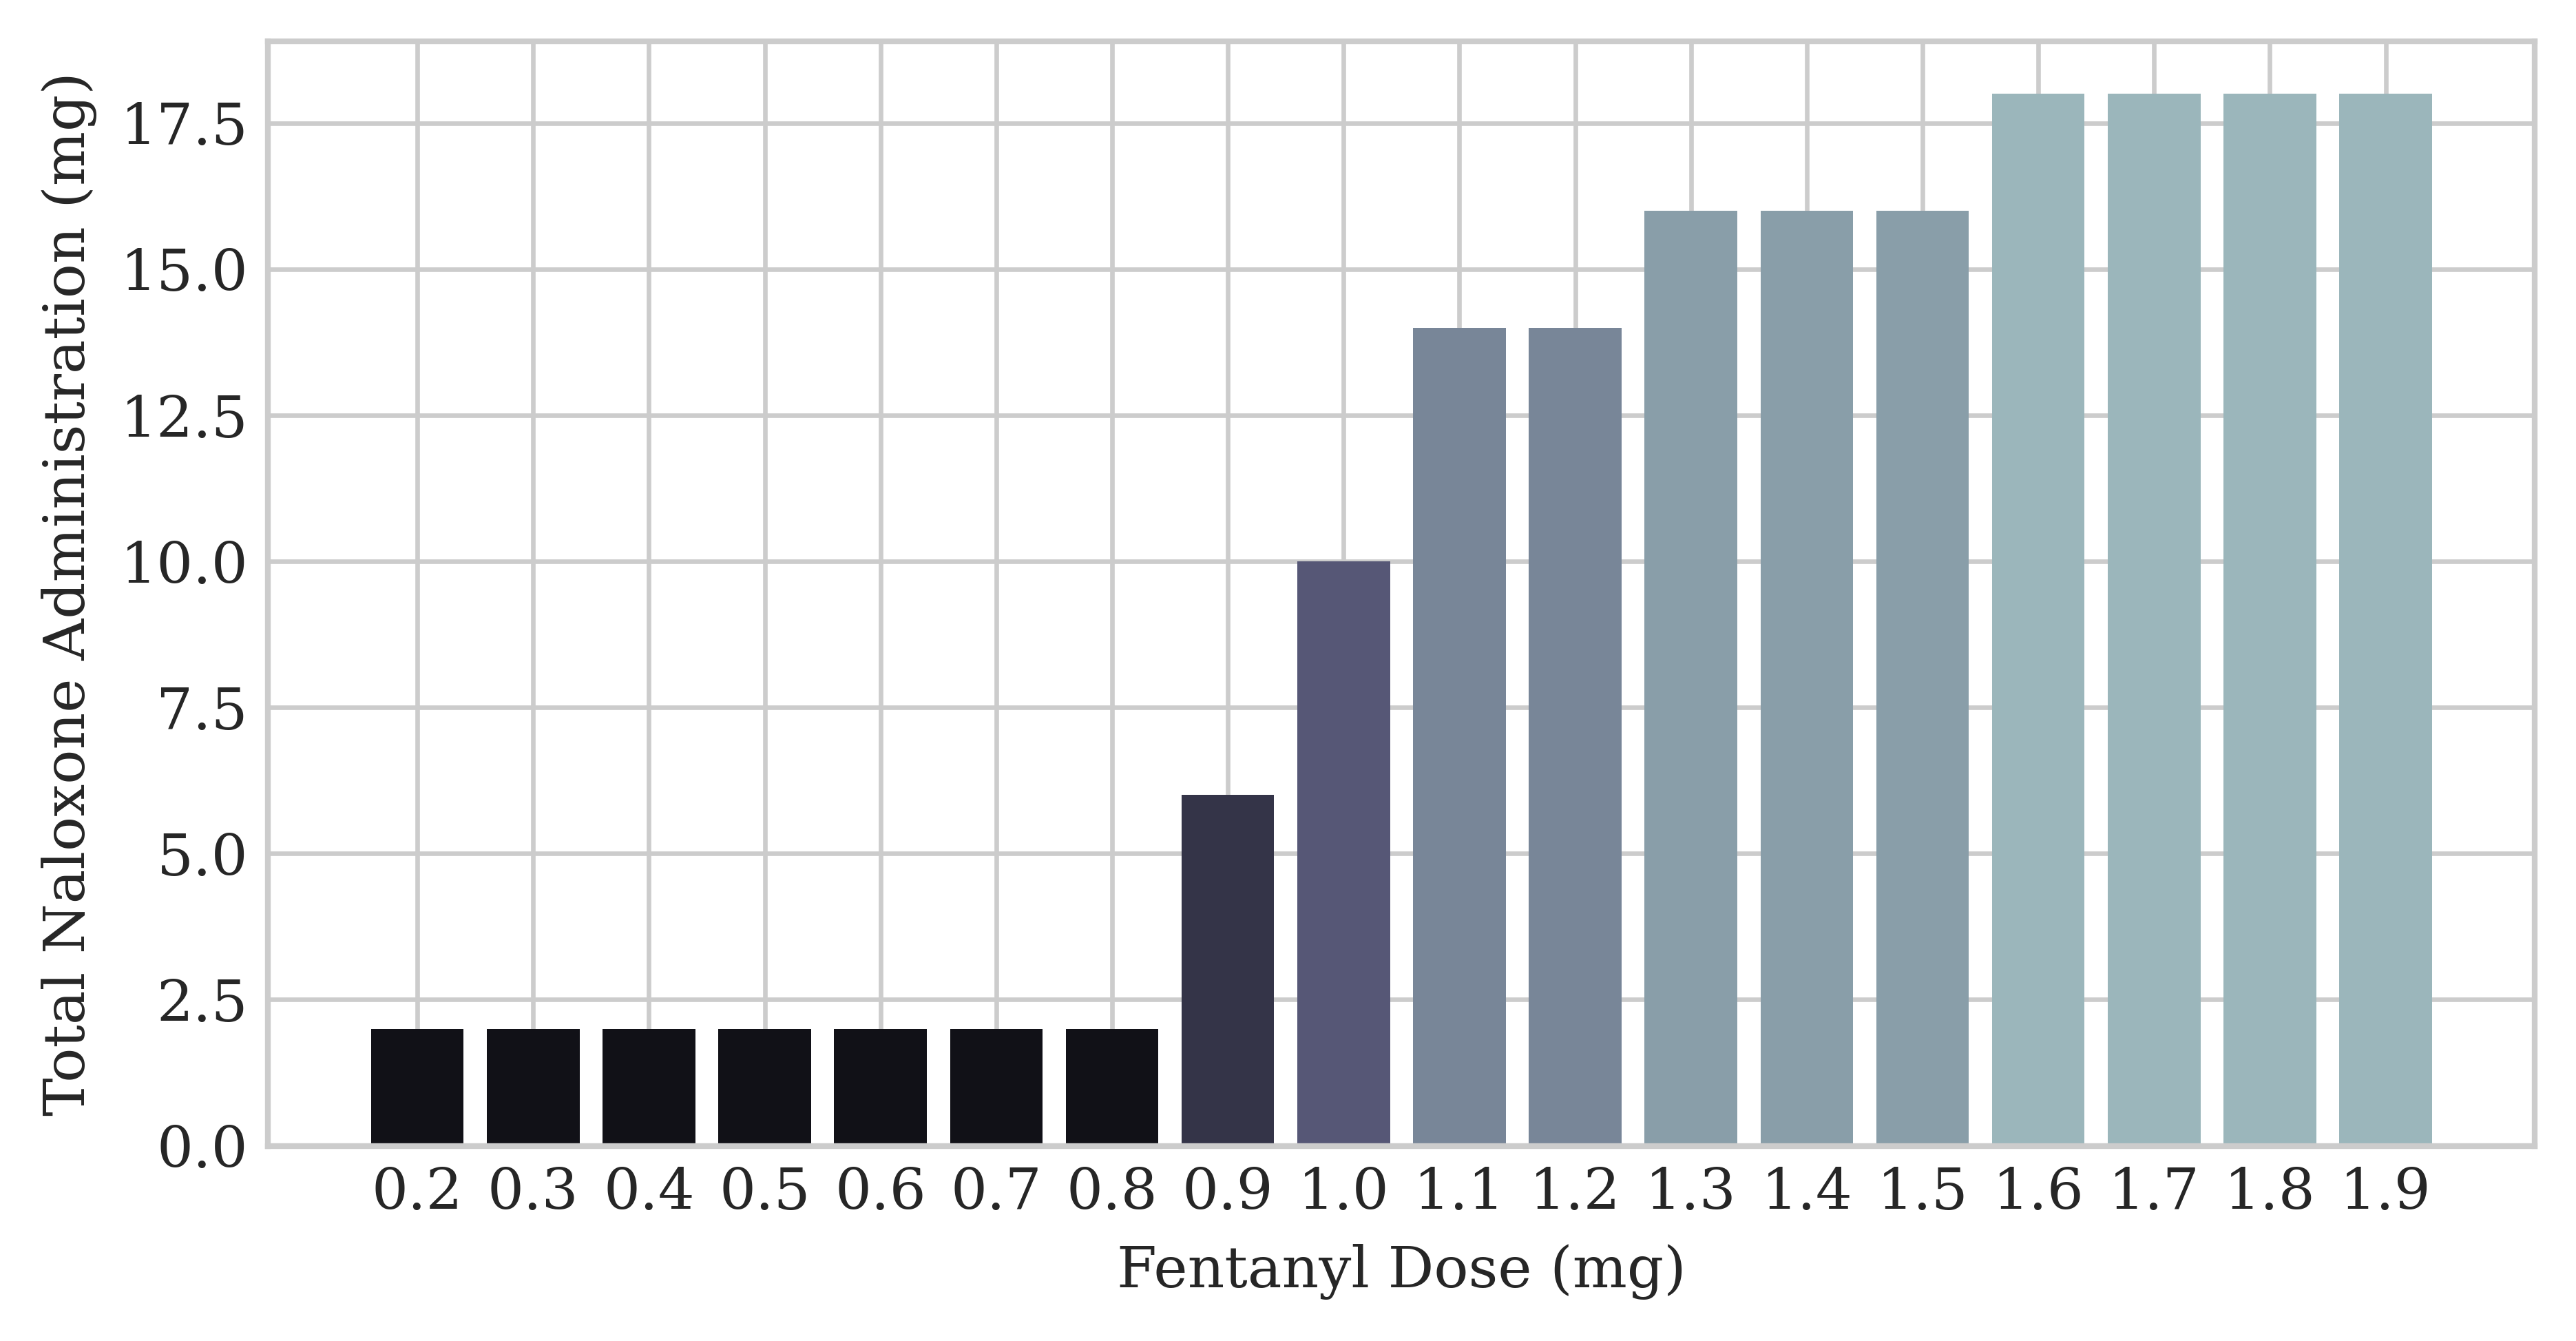

In [230]:
# bar graph with total naloxone amounts: 

#first create a list of all the fentanyl doses
doses = np.linspace(0.20, 1.9, num=18)
naloxoneDoses = []
doses = doses.tolist()


for name in names:
    naloxoneDoses.append(df.loc[name, 'totalNaloxone_mg'].max())

x = np.arange(len(naloxoneDoses))


naloxoneDoses.sort()
naloxoneDoses = [x + 2.0 for x in naloxoneDoses]   #forgot to add the first rescue dose in c++ code, adding it back here
print(naloxoneDoses)
colors = cm.bone(naloxoneDoses / (max(naloxoneDoses)+8))  #8 is just to shift the spectrum a bit for visibility of the top end
print(colors)
fig1, ax3 = plt.subplots(figsize=(7.08,3.54), dpi=600)
ax3.set_ylabel('Total Naloxone Administration (mg)')
ax3.set_xlabel('Fentanyl Dose (mg)')
ax3.bar(x,naloxoneDoses[:18], tick_label=np.around(doses, 2), color=colors)
plt.savefig('drugAdministration.png', dpi=500)

[2.0, 6.0, 10.0, 14.0, 14.0, 16.0]


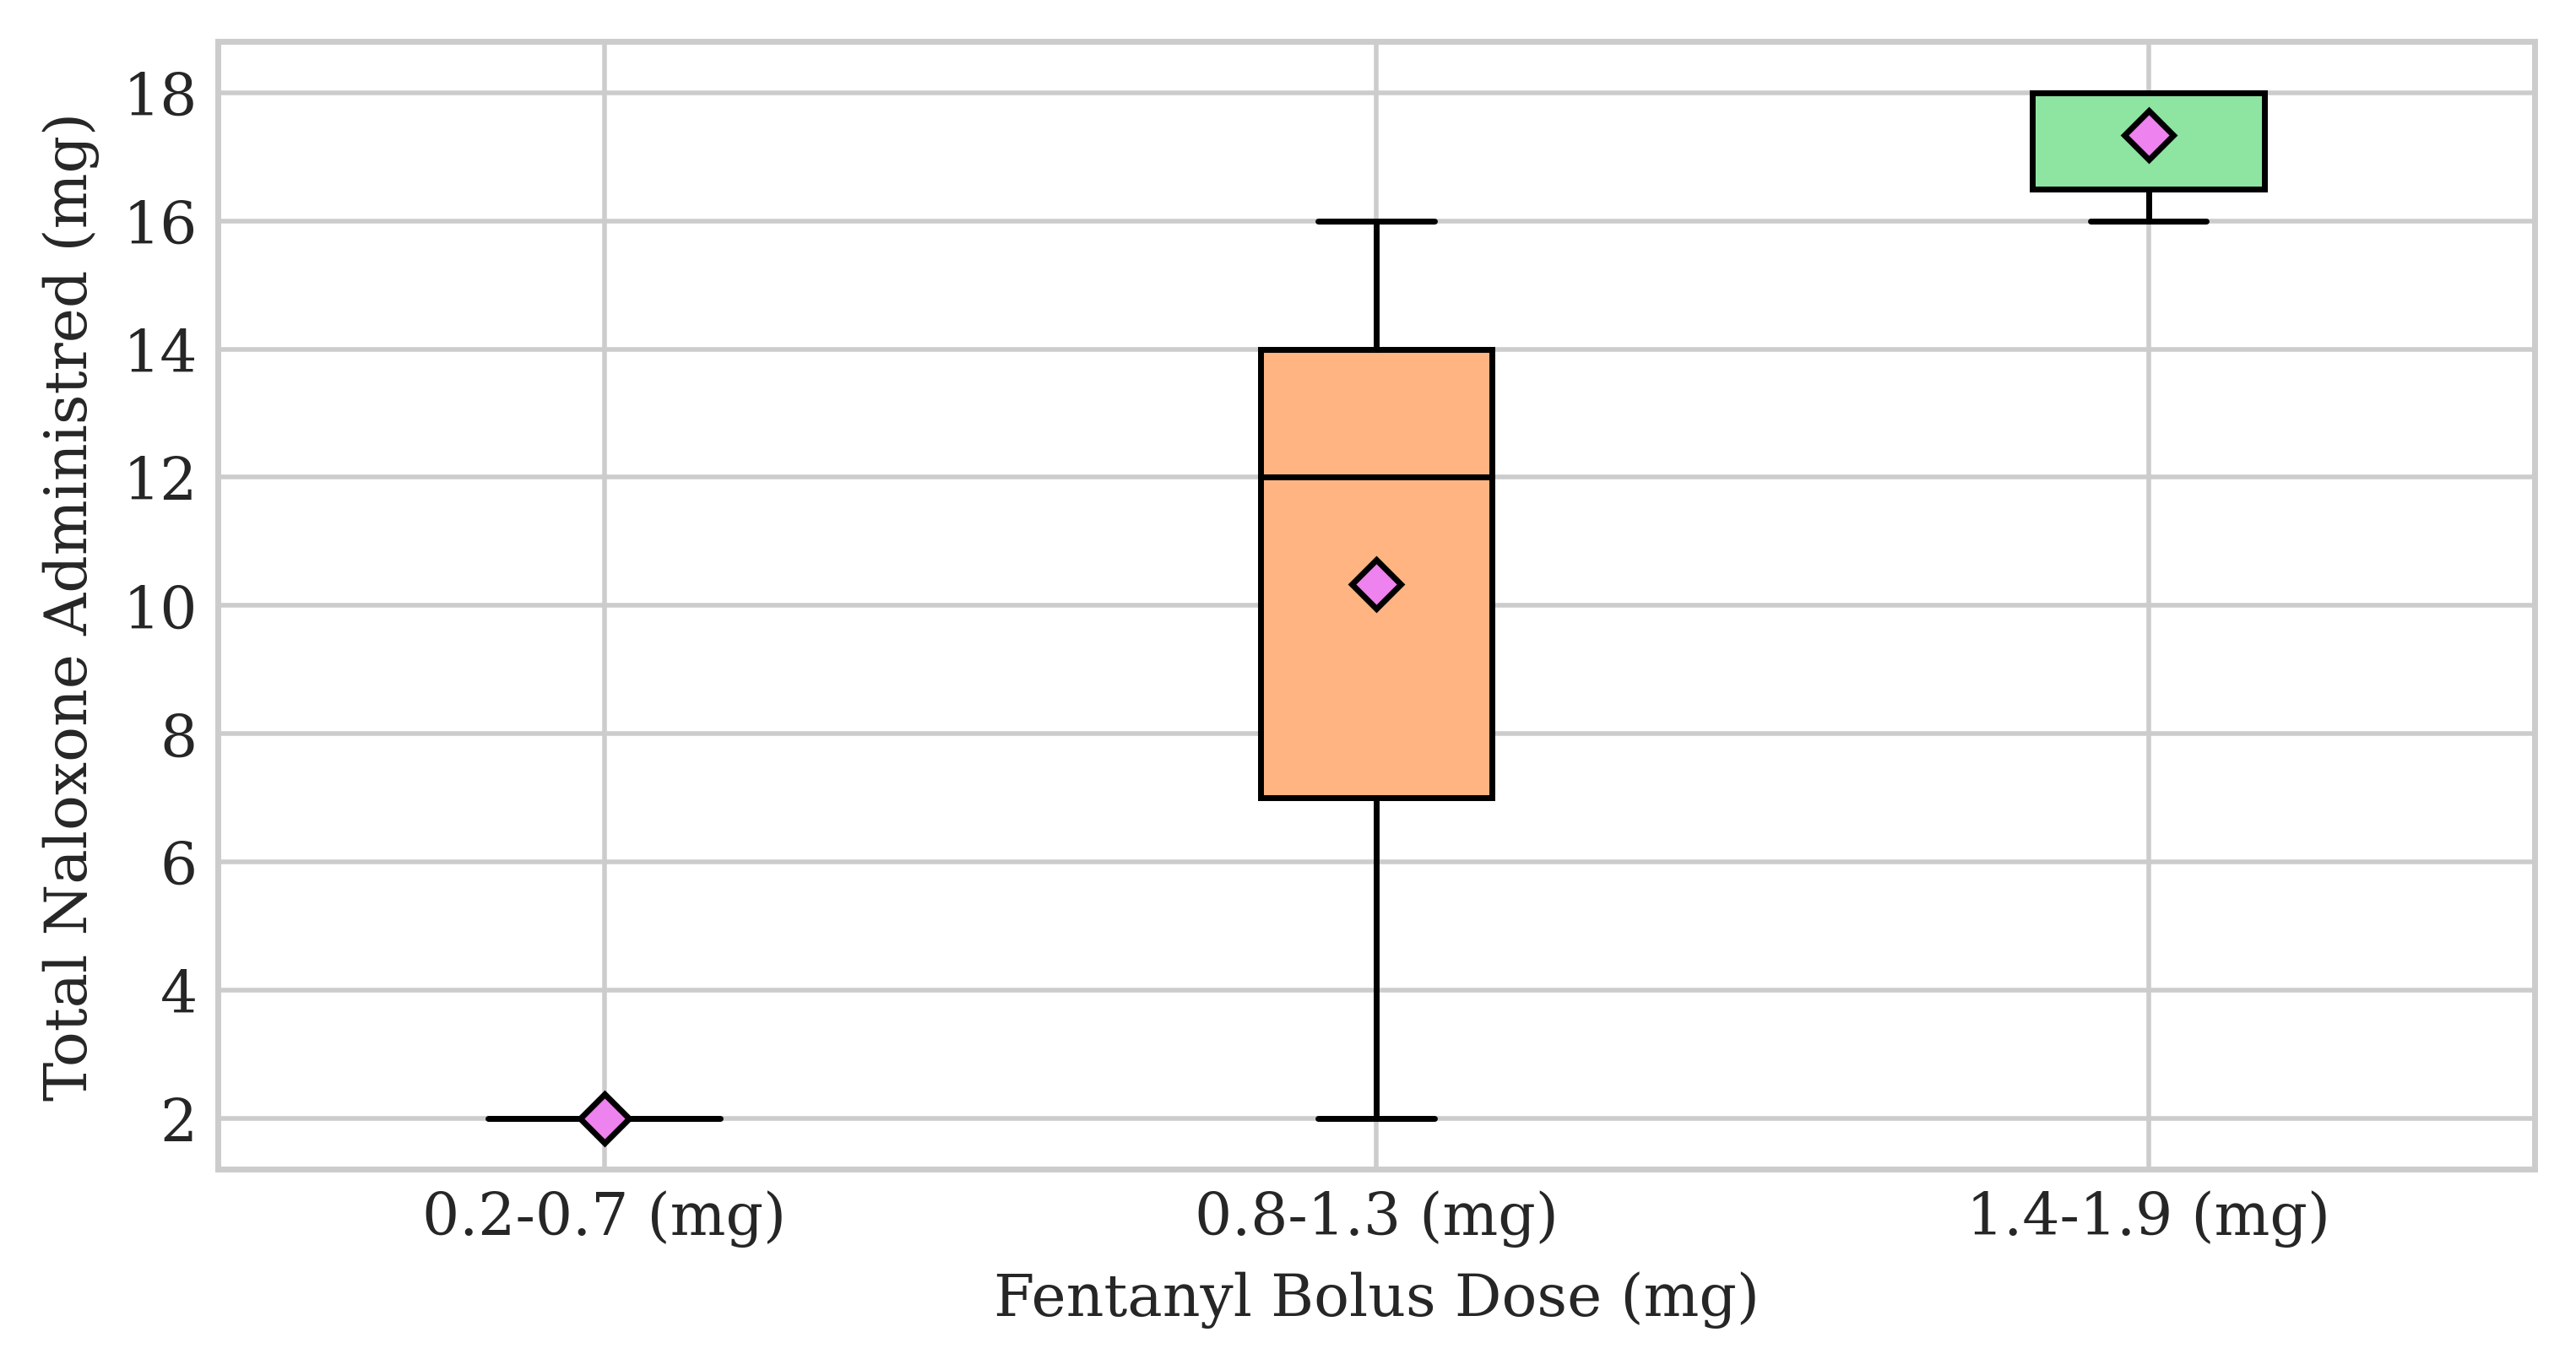

In [263]:
# now last figure of a box plot with the mean and sd for each bin of 6 doses of fenanyl

chunk1 = naloxoneDoses[0:6]
chunk2 = naloxoneDoses[6:12]
chunk3 = naloxoneDoses[12:18]

ticks = ['0.2-0.7 (mg)','0.8-1.3 (mg)', '1.4-1.9 (mg)' ]
meapointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='violet')


chunks = [chunk1, chunk2, chunk3]
fig2, ax4 = plt.subplots(figsize=(7.08,3.54), dpi=500)
bp = ax4.boxplot(chunks, showmeans=True, patch_artist=True, meanprops=meapointprops)
xticks = [0.5] + [x + 0.5 for x in ax.get_xticks()]
ax.set_xticks(xticks, minor=True)
ax4.set_xticklabels(ticks)
ax4.set_ylabel('Total Naloxone Administred (mg)')
ax4.set_xlabel('Fentanyl Bolus Dose (mg)')


colors = sns.color_palette('pastel')
for patch, color in zip(bp['boxes'], colors):
    patch.set(facecolor=color)
ax.tick_params(axis='x', which='minor', length=3, width=1)
plt.setp(bp['medians'], color='k')
plt.setp(bp['means'], color='b')
plt.savefig('boxPlot.png', dpi=500)
print(chunk2)